In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from PIL import Image
from numpy import asarray
import math
import numpy.matlib
from scipy.stats import multivariate_normal as mvn
import scipy.io
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

data=pd.DataFrame(faces['data'])
imges=faces['images']
target=faces['target'].tolist()
shape=imges.shape


{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

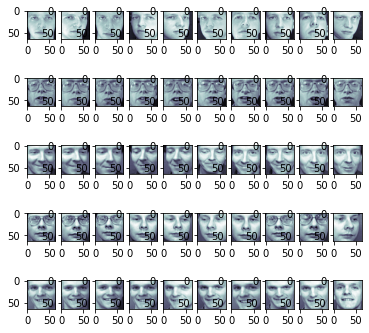

In [102]:
fig, axes = plt.subplots(5, 10, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(np.array(data)[i].reshape(64, 64), cmap='bone')
plt.show()

In [103]:
def split(data, target):
    train_data, test_data, train_target, test_target = train_test_split(data, target)
    return train_data, test_data, train_target, test_target
train_data, test_data, train_target, test_target = split(data, target)

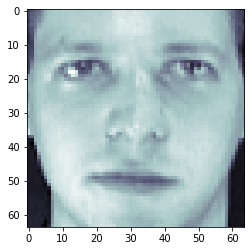

In [104]:
def img_show(data,x=1,y=1):
    fig, axes = plt.subplots(x, y)
    if data.shape !=(64,64) and data.shape!=(4096,):
        
        for i, ax in enumerate(axes.flat):
            ax.imshow(np.array(data)[i].reshape(64, 64), cmap='bone')
        plt.show()
    else:
        plt.imshow(np.array(data).reshape(64, 64), cmap='bone')   

img_show(data.T[0])

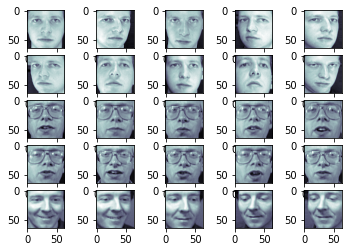

In [105]:
img_show(data,5,5)

In [106]:
def pcatrain(data,threshhoold):
    pca_raw = PCA().fit(data)   
    pca = PCA(n_components=len(np.where(pca_raw.explained_variance_ratio_.cumsum() > threshhoold))).fit(data)
    return pca, pca_raw.explained_variance_ratio_.cumsum()

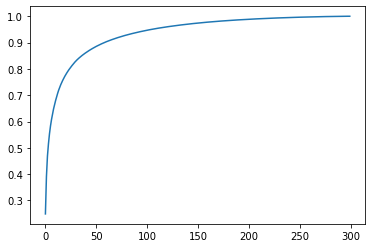

In [117]:
trained=pcatrain(train_data,0.9)[0].transform(data)
plt.plot(pcatrain(train_data,0.9)[1])

In [108]:
test=np.where(pca.explained_variance_ratio_.cumsum() > 0.95)
pca = PCA(n_components=105).fit(train_data)
#####################
X_train_pca = pca.transform(train_data)
X_train_pca.shape

(300, 105)

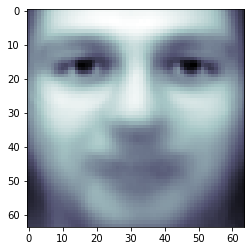

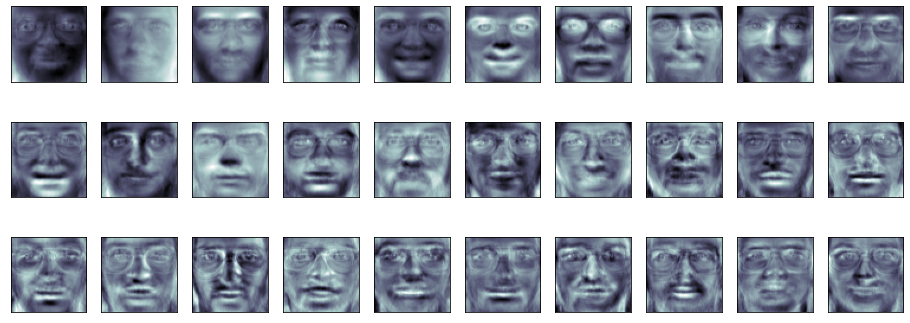

In [118]:
plt.imshow(pca.mean_.reshape(64,64),
           cmap=plt.cm.bone)
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(64,64),
              cmap=plt.cm.bone)

In [82]:
test_data.shape

(100, 4096)

In [89]:
def NB(X,y):
    gnb = GaussianNB(var_smoothing=1e-3)
    return gnb.fit(X, y)
nb=NB(train_data,train_target)
nb.predict(test_data)

array([19,  5, 22, 18,  8, 36, 16, 32,  7,  2, 18, 33, 22, 38, 19, 31, 27,
       30, 19, 18, 34, 10, 37, 16, 18, 28,  2, 12, 34, 30, 33, 12, 30, 39,
        7,  3, 10,  2, 24, 27,  6, 27, 17, 39,  2, 30,  3, 25,  3, 26,  9,
       10, 20, 27,  7,  4, 29,  8, 20, 29, 21, 10, 21, 36, 24, 21, 17, 23,
        2, 28, 36,  7, 14,  8,  0,  4, 39, 36, 23,  5,  3,  9, 16, 38, 20,
       13, 17, 32, 20,  8, 26, 34, 26,  6, 20, 15, 34,  5, 22, 11])

In [125]:
def KNN(X,y):
    neigh = KNeighborsClassifier(n_neighbors=3)
    return neigh.fit(X,y)
knn=KNN(train_data,train_target)
knn.predict(test_data)

array([36, 15,  2, 22, 10, 29, 18,  2, 22, 25, 10, 19, 33, 11,  6, 27,  1,
       17, 31, 28,  1,  2, 32, 29, 38, 34, 10, 30, 22, 11, 12, 32,  2, 32,
       11, 14, 38, 20, 34,  6,  4, 11, 36, 33, 24, 12,  7,  3, 18, 26,  1,
       24, 14, 14,  6, 14, 28, 27,  0, 22, 11, 20, 21, 17, 33,  0, 37, 32,
       22,  4, 20, 18, 10, 14,  8, 12,  1, 37,  9, 38, 22,  6,  1, 25, 17,
        9,  2, 13, 16, 26, 14, 23, 36, 28, 16, 27,  8,  2, 35, 14])

In [139]:
#############################
def Gaussian(data,mu,sigma):
    temp=[]
    for i in data:
        temp.append(np.exp(-0.5*(i-mu).T@np.linalg.inv(sigma)@(i-mu))/((np.linalg.det(sigma))**0.5))
    return np.asarray(temp)

def em_alg(data,y):
    seed=1
    ndata=np.asarray(data)
    m, n = ndata.shape
    C = np.matmul(ndata.T, ndata)/m
  
    # pca the data
    d = 4  # reduced dimension
    V,_,_ = np.linalg.svd(C)
    V = V[:, :d]

    pdata = np.dot(ndata,V)
    K = 2

    # random seed


    # initialize prior
    np.random.seed(seed)
    pi = np.random.random(K)
    pi = pi/np.sum(pi)

    # initial mean and covariance
    np.random.seed(seed)
    mu = np.random.randn(K,d)
    mu_old = mu.copy()

    sigma = []
    for ii in range(K):
        # to ensure the covariance psd
        np.random.seed(seed)
        dummy = np.random.randn(d, d)
        sigma.append(dummy@dummy.T+np.identity(d))

    # initialize the posterior
    tau = np.full((m, K), fill_value=0.)
    logtau = np.full((m, K), fill_value=0.)
    #####
    maxIter= 100
    tol = 1e-3

    #plt.ion()
    mu_list=[]   
    for ii in range(100):

        # E-step    
        for kk in range(K):
            tau[:, kk] = pi[kk] * Gaussian(pdata, mu[kk], sigma[kk])

        # normalize tau
        sum_tau = np.sum(tau, axis=1)
        mu_list.append(np.mean(np.log(sum_tau)))
        sum_tau.shape = (m,1)    
        tau = np.divide(tau, np.tile(sum_tau, (1, K)))


        # M-step
        for kk in range(K):
            # update prior
            pi[kk] = np.sum(tau[:, kk])/m

            # update component mean
            mu[kk] = pdata.T @ tau[:,kk] / np.sum(tau[:,kk], axis = 0)

            # update cov matrix
            dummy = pdata - np.tile(mu[kk], (m,1)) # X-mu
            sigma[kk] = dummy.T @ np.diag(tau[:,kk]) @ dummy / np.sum(tau[:,kk], axis = 0)

        if np.linalg.norm(mu-mu_old) < tol:
            print('training coverged')
            break
        mu_old = mu.copy()
        if ii==99:
            print('max iteration reached')
            break

        return mu_list, mu, sigma, V

mu_list, mu, sigma,  V = em_alg(train_data,train_target)



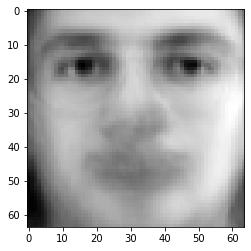

In [140]:
plt.imshow((V@(mu[0])).T.reshape((64,64)), cmap=plt.cm.gray)